2. Train an MLP for CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR-10 dataset consists of 60000 32 × 32 colour images in 10 classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each 32 × 32 image consists of three color channels (Red, Green, and Blue) for a total of 3 × 32 × 32 = 3072 pixels. There are
50000 training images and 10000 test images. Use two hidden layers and ReLU activations. Use 256 nodes in the first hidden layer and 128 nodes in the second hidden layer. Use a dropout layer for each hidden layer output with 30% dropout rate and use an L2 regularizer with coefficient λ = 0.0001. You may use the demo scripts from lecture and discussion.
Evaluate this trained model on the test data and compute a “confusion matrix” – i.e., find the classification rate conditioned on the true class. Element (i, j) of the confusion matrix is the rate at which the network decides class j when class i is the correct label (ground truth).

In [ ]:
# Importing the necessary libraries.
import numpy as np
import torch
import torch.nn as nn # nn -> Neural Network.
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Converting the dataset to tensor and normalizing the data: 
convert = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Loading the training dataset. 
training_dataset = torchvision.datasets.CIFAR10(root = f'data', train = True, download = True, transform = convert)
testing_dataset = torchvision.datasets.CIFAR10(root = f'data', train = False, download = True, transform = convert)
# Loading the testing dataset.
trainingdataset_loader = torch.utils.data.DataLoader(training_dataset, batch_size = 100, shuffle = True, num_workers = 2) # Shuffling the training dataset.
testingdataset_loader = torch.utils.data.DataLoader(testing_dataset, batch_size = 100, shuffle = False, num_workers = 2)
# Defining the classes present in the dataset:
classes = ['Airplanes', 'Cars', 'Birds', 'Cats','Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']
# Loss function initialization.
loss_function = nn.CrossEntropyLoss()

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Initializing the two hidden layers and ReLU activation:
class Neural_network(nn.Module):
    def __init__(self):
        super(Neural_network, self).__init__()
        self.hidden_layer1 = nn.Linear(in_features = 3072, out_features = 256)
        self.hidden_layer2 = nn.Linear(in_features = 256, out_features = 128)
        self.output = nn.Linear(in_features = 128, out_features = 10)
        self.drop = nn.Dropout(0.3) # Dropping neurons with 30% probability.

    def forward(self, n): # Forward propagation function.
        n = F.relu(self.hidden_layer1(n)) # Activation function -> ReLU. 
        n = self.drop(n)
        n = F.relu(self.hidden_layer2(n))
        n = self.drop(n)
        return self.output(n)
# Defining the model:
model = Neural_network()
# Defining the (standard) Stochastic Gradient Descent optimizer for model:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.015, weight_decay = 0.0002) # Learning rate = 0.015 & lambda = 0.0001 or 10^(-3).
# Initializing the number of epochs and defining the lists for: loss during training & testing phase, accuracy during training & testing phase.
epochs = 40
training_loss = []
training_accuracy = []
testing_loss = []
testing_accuracy = []
# Looping over the epochs:
for num in range(epochs):
    correct_training = 0
    correct_testing = 0
    train_loss = 0
    test_loss = 0
    # Training the model:
    for images, labels in trainingdataset_loader:
        input = images.view(-1, 3 * 32 * 32)
        # Forward propagation:
        output = model(input)
        pred = torch.max(output, 1)[1] # Checking whether the model has correctly detected the images.
        loss = loss_function(output, labels) # Implementing the loss function.
        correct_training += (pred == labels).sum().numpy()
        train_loss += loss.data # Storing the loss during the training phase.
        # Backward propagation:
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Testing the model:
    for images, labels in testingdataset_loader:
        input = images.view(-1, 3 * 32 * 32)
        # Forward propagation:
        output = model(input)
        loss = loss_function(output, labels) # Implementing the loss function.
        pred = torch.max(output, 1)[1] # Checking whether the model has correctly detected the images.
        correct_testing += (pred == labels).sum().numpy()
        test_loss += loss.data # Storing the loss during the testing phase.
    # Appending the final loss and accuracy during both the phases (training & testing):
    training_loss.append(train_loss / len(trainingdataset_loader.dataset))
    training_accuracy.append(correct_training / len(trainingdataset_loader.dataset))
    testing_loss.append(test_loss / len(testingdataset_loader.dataset))
    testing_accuracy.append(correct_testing / len(testingdataset_loader.dataset))
# Printing the accuracies:
print('Final accuracy during the training phase:' , training_accuracy[-1] * 100, '%') 
print('Final accuracy during the training phase:' , testing_accuracy[-1] * 100, '%')

Final accuracy during the training phase: 60.548 %
Final accuracy during the training phase: 51.04 %


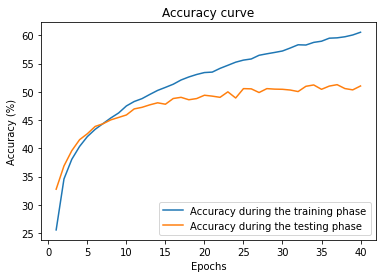

In [ ]:
# Plotting the accuracy graph:
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(range(1, epochs + 1), np.array(training_accuracy) * 100, label = "Accuracy during the training phase")
plt.plot(range(1, epochs + 1), np.array(testing_accuracy) * 100, label = "Accuracy during the testing phase")
plt.legend()
plt.show()

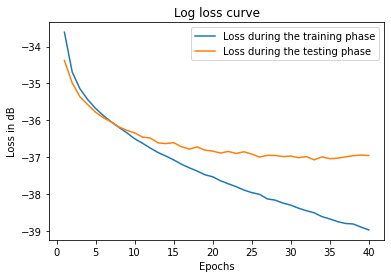

In [ ]:
# Plotting the loss graph:
plt.title("Log loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss in dB")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(training_loss)), label = "Loss during the training phase")
plt.plot(range(1, epochs + 1), 20 * np.log10(np.array(testing_loss)), label = "Loss during the testing phase")
plt.legend()
plt.show()

(a) Use seaborn or like python package to generate a heatmap showing the confusion matrix.

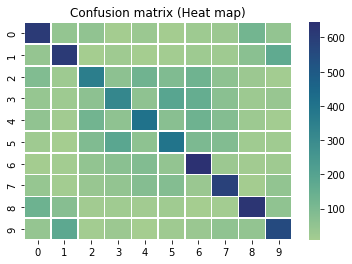

Most frequent mis-classifications: -
Actual class		Model prediction		Number of times the model has mis-classified
Airplanes 			   Ships 				   121
Cars 			   Trucks 				   171
Birds 			   Frogs 				   131
Cats 			   Dogs 				   193
Deer 			   Frogs 				   135
Dogs 			   Cats 				   188
Frogs 			   Deer 				   86
Horses 			   Dogs 				   85
Ships 			   Airplanes 				   136
Trucks 			   Cars 				   180


In [ ]:
# Initializing the confusion matrix: 
confusion_matrix = np.zeros([10, 10])

for images, labels in testingdataset_loader:
        input = images.view(-1, 3 * 32 * 32)
        output = model(input)
        pred = torch.max(output, 1)[1]
        
        for j in range(100):
            confusion_matrix[labels[j]][pred[j]] += 1
# Plotting the confusion matrix:
heat = sns.heatmap(confusion_matrix, linewidth = 0.5, cmap = 'crest')  
plt.title("Confusion matrix (Heat map)")
plt.show()

for ele in range(10):
    confusion_matrix[ele][np.argmax(confusion_matrix[ele])] = 0

print('Most frequent mis-classifications: -')
print('Actual class\t\tModel prediction\t\tNumber of times the model has mis-classified')

for i in range(10):
    print(classes[i], "\t\t\t  ", classes[np.argmax(confusion_matrix[i])],"\t\t\t\t  ", int(confusion_matrix[i][np.argmax(confusion_matrix[i])]))

(b) Consider class m. List the class most likely confused for class m for each object type.

(c) Which two classes (object types) are most likely to be confused overall?

**Answer: -** Cats were mis-classified as dogs 193 times and the vice versa was 188 times.
              Trucks were mis-classified as cars 190 times and the vice versa was 171.